* [Variables List](https://api.census.gov/data/2019/abscbo/variables.html) <br/><br/>
* [Characteristics of Business Owners Documentation (SCROLL DOWN FOR DESCRIPTION TAGS)](https://www2.census.gov/programs-surveys/abs/technical-documentation/api/ABS_API_CB-1-26-2021.pdf)

In [3]:
# CHARACTERISTICS OF BUSINESS OWNERS

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
# MAKE SURE THERE ARE NO WHITE SPACES IN ANY VARIABLE STRINGS
labels = 'OWNER_SEX,OWNER_SEX_LABEL,OWNER_RACE,OWNER_RACE_LABEL,QDESC,QDESC_LABEL,OWNPDEMP'

data_group = '&for=us:'  # FOR ENTIRE USA
#data_group = '&for=state:' # FOR STATES


description =f'*&QDESC_LABEL=YRACQBUS'
API_key = '&key=c6b7e1b92bdb71318a1409319242da65cd5aac05'

df = pd.read_json(f'https://api.census.gov/data/2018/abscbo?get={labels}{data_group}{description}{API_key}')
new_header = df.iloc[0]
df = df[1:]
df.columns = new_header
df['OWNPDEMP'] = df['OWNPDEMP'].astype(int)
df.sort_values(by=['OWNER_RACE_LABEL', 'OWNER_SEX_LABEL'])

df                           

,OWNER_SEX,OWNER_SEX_LABEL,OWNER_RACE,OWNER_RACE_LABEL,QDESC,QDESC_LABEL,OWNPDEMP,QDESC_LABEL,us
1,002,Female,40,Black or African American,O02,YRACQBUS,248,YRACQBUS,1
2,003,Male,40,Black or African American,O02,YRACQBUS,977,YRACQBUS,1
3,001,All owners of respondent firms,50,American Indian and Alaska Native,O02,YRACQBUS,372,YRACQBUS,1
4,001,All owners of respondent firms,00,All owners of respondent firms,O02,YRACQBUS,146045,YRACQBUS,1
5,002,Female,00,All owners of respondent firms,O02,YRACQBUS,33689,YRACQBUS,1
6,003,Male,00,All owners of respondent firms,O02,YRACQBUS,112357,YRACQBUS,1
7,001,All owners of respondent firms,30,White,O02,YRACQBUS,140242,YRACQBUS,1
8,002,Female,30,White,O02,YRACQBUS,32051,YRACQBUS,1
9,003,Male,30,White,O02,YRACQBUS,108193,YRACQBUS,1
10,001,All owners of respondent firms,40,Black or African American,O02,YRACQBUS,1224,YRACQBUS,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 1 to 24
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   OWNER_SEX         24 non-null     object
 1   OWNER_SEX_LABEL   24 non-null     object
 2   OWNER_RACE        24 non-null     object
 3   OWNER_RACE_LABEL  24 non-null     object
 4   QDESC             24 non-null     object
 5   QDESC_LABEL       24 non-null     object
 6   OWNPDEMP          24 non-null     int32 
 7   QDESC_LABEL       24 non-null     object
 8   us                24 non-null     object
dtypes: int32(1), object(8)
memory usage: 1.7+ KB


In [5]:
df.OWNER_RACE_LABEL.value_counts()

Black or African American                     3
American Indian and Alaska Native             3
All owners of respondent firms                3
White                                         3
Asian                                         3
Native Hawaiian and Other Pacific Islander    3
Minority                                      3
Nonminority                                   3
Name: OWNER_RACE_LABEL, dtype: int64

In [6]:
df.OWNER_SEX_LABEL.value_counts()

Female                            8
Male                              8
All owners of respondent firms    8
Name: OWNER_SEX_LABEL, dtype: int64

In [7]:
df.groupby(['OWNER_SEX_LABEL','OWNER_RACE_LABEL']).agg({'OWNPDEMP':max})

0                                                                          OWNPDEMP
OWNER_SEX_LABEL                OWNER_RACE_LABEL                                    
All owners of respondent firms All owners of respondent firms                146045
                               American Indian and Alaska Native                372
                               Asian                                           4497
                               Black or African American                       1224
                               Minority                                        9261
                               Native Hawaiian and Other Pacific Islander       136
                               Nonminority                                   136785
                               White                                         140242
Female                         All owners of respondent firms                 33689
                               American Indian and Alaska Native                127
                               Asian                                           1282
                               Black or African American                        248
                               Minority                                        2806
                               Native Hawaiian and Other Pacific Islander         0
                               Nonminority                                    30884
                               White                                          32051
Male                           All owners of respondent firms                112357
                               American Indian and Alaska Native                245
                               Asian                                           3214
                               Black or African American                        977
                               Minority                                        6455
                               Native Hawaiian and Other Pacific Islander        76
                               Nonminority                                   105903
                               White                                         108193

In [8]:
sorted_sex = df.query('OWNER_RACE_LABEL == "All owners of respondent firms"')

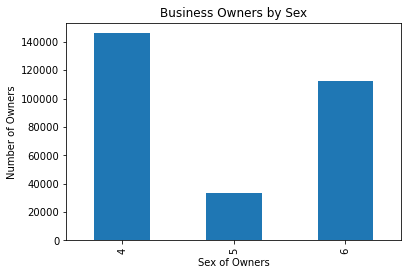

In [13]:
owner_sex = sorted_sex[['OWNER_SEX_LABEL','OWNPDEMP']] 
sex = owner_sex.OWNPDEMP.view(int)
ax = sex.plot(title = 'Business Owners by Sex',kind='bar')
ax.set_xlabel('Sex of Owners')
ax.set_ylabel('Number of Owners')
plt.show()

In [10]:
sorted_race = df.query('OWNER_SEX_LABEL == "All owners of respondent firms"')

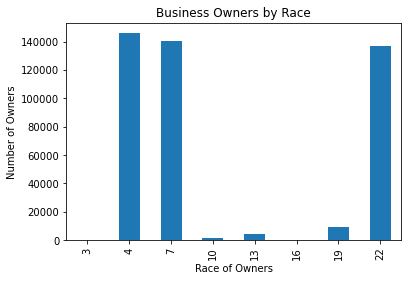

In [11]:
owner_race = sorted_race[['OWNER_RACE_LABEL','OWNPDEMP']] 
race = owner_race.OWNPDEMP.view(int)
ax = race.plot(title = 'Business Owners by Race',kind = 'bar')
ax.set_xlabel('Race of Owners')
ax.set_ylabel('Number of Owners')
plt.show()

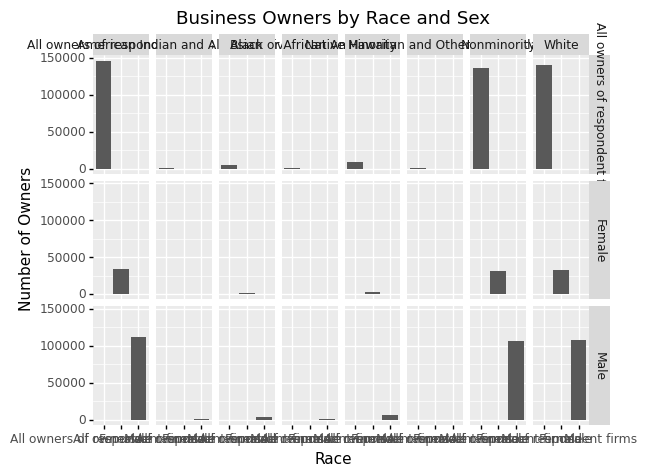

<ggplot: (193968727357)>

In [12]:
import plotnine
from plotnine import ggplot, aes, facet_grid, labs, geom_bar

(
    ggplot(df)
    + facet_grid(facets='OWNER_SEX_LABEL~OWNER_RACE_LABEL')
    + aes(x='OWNER_SEX_LABEL', y='OWNPDEMP')
    + labs(
        x='Race',
        y='Number of Owners',
        title='Business Owners by Race and Sex',
    )
    + geom_bar(stat = 'identity')
)